In [1]:
import ROOT as r

Welcome to JupyROOT 6.30/04


In [1]:
#r.gROOT.LoadMacro('MyFunction.cc+')

In [2]:
import matplotlib.pyplot as plt

Event number i and tμ: 0 0
Event number i and tμ: 100 5.195196828630287
Event number i and tμ: 200 0.4283584406293812
Event number i and tμ: 300 -0.0008157153424690478
Event number i and tμ: 400 9.399837290402502e-05
Event number i and tμ: 500 -8.964692096924409e-05
Event number i and tμ: 600 0.03561009313852992
Event number i and tμ: 700 -8.228162187151611e-07
Event number i and tμ: 800 0.9092933161737164
Event number i and tμ: 900 -0.00012580573093146086
[#0] WARNING:InputArguments -- The parameter 'sigma' with range [-inf, inf] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:ObjectHandling -- RooWorkspace::import() importing dataset shape1Data
[#1] INFO:ObjectHandling -- RooWorkSpace::import() changing name of dataset from  shape1Data to data_null

RooWorkspace()  contents

variables
---------
(bkgfrac,l,l1,mu,mu1,sigma,sigma1,x)

p.d.f.s
-------
RooGaussian::gauss[ x=x mean=mu sigma=sigma ] = 1
RooGaussian::gauss1[ x=x mean=mu1 si

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



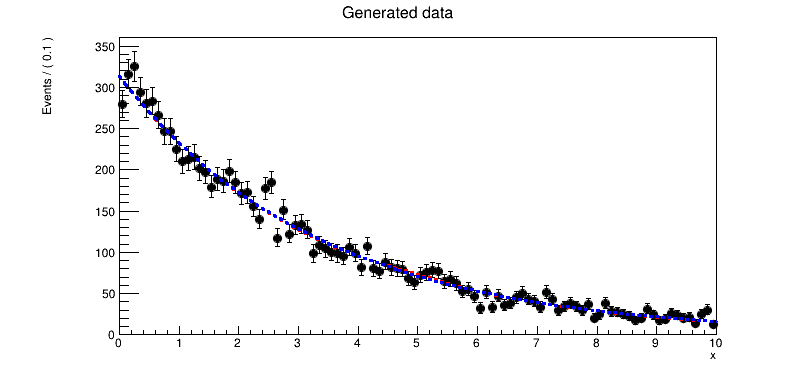

In [23]:
#seed = r.RooRandom.uniform()

#r.RooRandom.randomGenerator().SetSeed(seed)   
#r.RooRandom.randomGenerator().SetSeed(3001) 
t_μ_arr1 = []
tμ = 0
histogram = r.TH1F("histogram", "Sample Histogram;X-axis;Y-axis", 50, -.010, 10)
for i in range(1000):
    if i%100==0:
        print("Event number i and tμ:",i,tμ)
    wspace = r.RooWorkspace()                                                                                       
    wspace.factory("Gaussian::gauss(x[0,10],mu[5],sigma[.5])")                                       
    wspace.factory("Exponential::shape(x,l[-.3,-5,5])")  
#

    wspace.factory("SUM::model2(bkgfrac[.9,0.5,1.0]*shape,gauss)"); 
#
    wspace.factory("Gaussian::gauss1(x[0,10],mu1[5,0,10],sigma1[.5,0.1,10])")                                       
    wspace.factory("Exponential::shape1(x,l1[-.3,-5,5])")   
    #wspace.factory("SUM::model(bkgfrac1[1.,0.99,1.]*shape1,gauss1)");                                                   
#wspace.defineSet("poi", "mu")                                                                                  
#wspace.defineSet("obs", "x")  

    #data = wspace.pdf("model2").generate(r.RooArgSet(wspace.var("x")), 1000)                                        
    #getattr(wspace, 'import')(data, r.RooFit.Rename("data"))
                                                      
    #data_null = wspace.pdf("model").generate(r.RooArgSet(wspace.var("x")), 1000)  
    data_null = wspace.pdf("shape1").generate(r.RooArgSet(wspace.var("x")), 10000)
    getattr(wspace, 'import')(data_null, r.RooFit.Rename("data_null")) 

    x = wspace.var("x")
#x1 = wspace.var("x1")
    model_data = wspace.pdf("model2")
    bkgonly_model = wspace.pdf("shape1")

    gauss = wspace.pdf("gauss")                                                                                     
    shape = wspace.pdf("shape")                                                                                     
                                                                                                                
    k = r.RooKeysPdf("k", "k", x, data_null, r.RooKeysPdf.NoMirror, 0.2)                                                 
    #getattr(wspace, 'import')(k, r.RooFit.RenameAllNodes("workspace"))                                              
                                                                                                        
    wspace.Print()  
    xframe2 = x.frame(r.RooFit.Title("Generated data"))  
#result = shape.fitTo(data_null,r.RooFit.Save())   
    result_null = model_data.fitTo(data_null,r.RooFit.Save())
    data_null.plotOn(xframe2)
    model_data.plotOn(xframe2,r.RooFit.LineColor(r.kRed),r.RooFit.LineStyle(r.kDashed))
    result = bkgonly_model.fitTo(data_null,r.RooFit.Save())
    #data.plotOn(xframe2)
    #shape.plotOn(xframe2)
    bkgonly_model.plotOn(xframe2,r.RooFit.LineColor(r.kBlue),r.RooFit.LineStyle(r.kDashed))
    c2 = r.TCanvas("Exercise02","Exercise02",800,400) 
    r.gPad.SetLeftMargin(0.15) ; xframe2.GetYaxis().SetTitleOffset(1.6) ; xframe2.Draw() ;  
    c2.Draw()  
    likelihood = result.minNll()
    likelihood_null = result_null.minNll()
    tμ = 2*(likelihood - likelihood_null)
    t_μ_arr1.append(tμ)
    histogram.Fill(tμ)
#print("t_μ_arr:",t_μ_arr)
#plt.hist(t_μ_arr)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


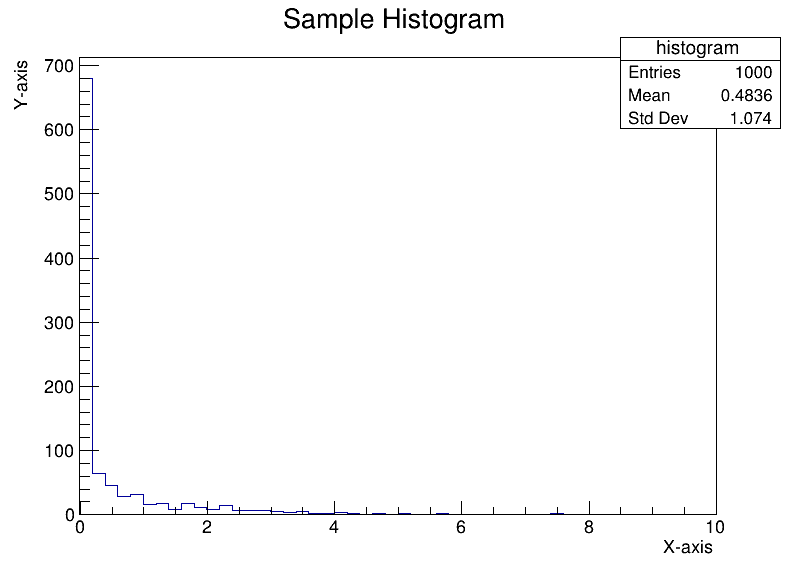

In [24]:
#histogram.SetBinContent(1, 0)
c1 = r.TCanvas("c1", "All the Histogram", 800, 600)
histogram.Draw()
c1.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      20.3017
NDf                       =           30
Edm                       =  6.64202e-07
NCalls                    =          541
p0                        =      97.4388   +/-   11.0413     
p1                        =     0.922018   +/-   0.139894    
p2                        =      149.994   +/-   103.408     
p3                        =    0.0279559   +/-   0.0248364   
p4                        =    0.0495631   +/-   0.050926    


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


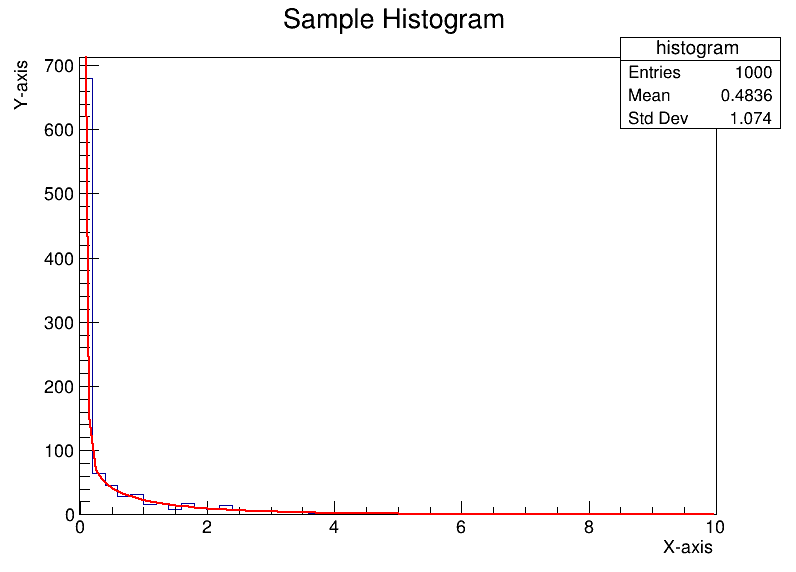

In [25]:

def chi2_func(x, par):
    # ROOT's TF1 needs a C-style function, this is a wrapper around the scipy.stats.chi2 PDF
    from scipy.stats import chi2
    return par[0] * chi2.pdf(x[0], df=par[1])
def delta_func(x, par):
    return par[2] * r.TMath.Gaus(x[0], par[3], par[4], True)
# Define the combined function
def combined_func(x, par):
    return chi2_func(x, par) + delta_func(x, par)

# Create a TF1 object for the combined function
combined_fit = r.TF1("combined_fit", combined_func, 0, 10, 5)
combined_fit.SetParameters(.5, 4, .5, 0, 0.1)  # Initial guess for parameters: normalization1, df, normalization2, mean, sigma

# Perform the fit
histogram.Fit(combined_fit, "R")

# Draw the histogram and the fit result
c1 = r.TCanvas("c1", "Combined Fit", 800, 600)
histogram.Draw()
combined_fit.Draw("same")
c1.Draw()


# End here

In [26]:
def chi2_func(x, par):
    # ROOT's TF1 needs a C-style function, this is a wrapper around the scipy.stats.chi2 PDF
    from scipy.stats import chi2
    return par[0] * chi2.pdf(x[0], df=par[1])

Entries in bin 1 after modification: 179.0
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      23.4265
NDf                       =           33
Edm                       =  4.29484e-07
NCalls                    =           67
p0                        =      119.883   +/-   8.15249     
p1                        =     0.707674   +/-   0.0779149   


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


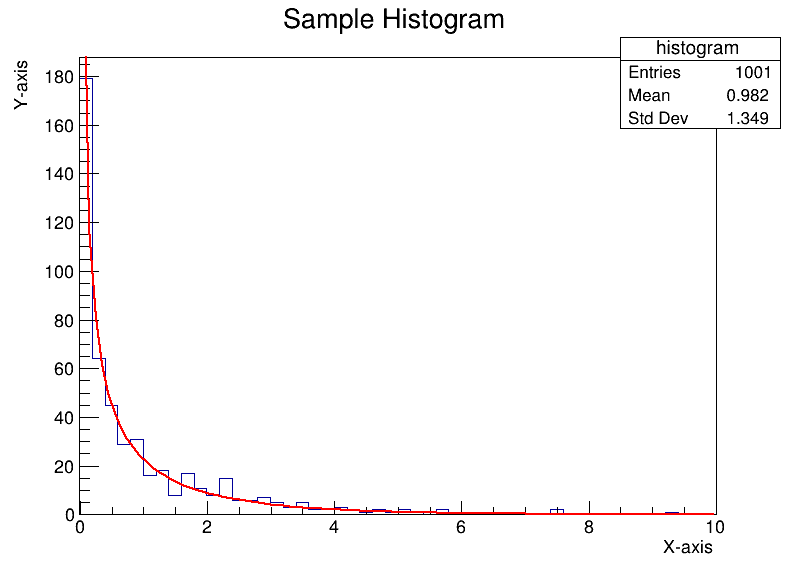

In [27]:
# Create a TF1 object for the chi-squared fit function
fit_func = r.TF1("fit_func", chi2_func, 0, 10, 2)
fit_func.SetParameters(1, 2)  # Initial guess for parameters (normalization, degrees of freedom)

# Perform the fit
bin_number = 1
current_content = histogram.GetBinContent(bin_number)
new_content = current_content - 500
histogram.SetBinContent(bin_number, new_content)

# Print the content of bin 50 after modification
print(f"Entries in bin {bin_number} after modification: {histogram.GetBinContent(bin_number)}")
# Draw the histogram and the fit result
histogram.Fit(fit_func, "R")
c1 = r.TCanvas("c1", "Chi2 Fit", 800, 600)
histogram.Draw()
fit_func.Draw("same")
c1.Draw()

In [20]:
class MyFunction(r.RooAbsPdf):
    def __init__(self,  x, dof):
        #super(MyFunction, self).__init__(name, title)
        self.x = x
        self.k = dof

    def evaluate(self):
        x_val = self.x.getVal()
        k_val = self.k.getVal()
        
        if x_val > 0:
            value = 1 / (2**(k_val/2) * TMath.Gamma(k_val/2)) * x_val**(k_val/2-1) * TMath.Exp(-x_val/2)
        elif x_val == 0:
            value = 0.5
        else:
            value = 0  # for negative values of x, the function is not defined

        return value


In [18]:
class MyFunction(r.RooAbsPdf):
    def __init__(self, name, title, x, dof):
        # Initialize the base class
        super(MyFunction, self).__init__(name, title)
        
        # Initialize parameters
        self.x = RooRealVar("x", "x", x.getVal(), x.getMin(), x.getMax())
        self.k = RooRealVar("dof", "dof", dof.getVal(), dof.getMin(), dof.getMax())
        
        # Attach parameters to the function
        self.addServer(self.x)
        self.addServer(self.k)
        
        # Create parameter set
        self._params = RooArgList(self.x, self.k)

    def evaluate(self):
        x_val = self.x.getVal()
        k_val = self.k.getVal()
        
        if x_val > 0:
            value = 1 / (2**(k_val/2) * TMath.Gamma(k_val/2)) * x_val**(k_val/2-1) * TMath.Exp(-x_val/2)
        elif x_val == 0:
            value = 0.5
        else:
            value = 0  # for negative values of x, the function is not defined

        return value

    def getAnalyticalIntegral(self, allVars, analVars, rangeName):
        return 0  # No analytical integral provided

    def analyticalIntegral(self, code, rangeName):
        return 1  # No analytical integral provided

t_μ_arr: [-0.00047564822307322174, 2.535976155581011, 0.48041744888178073, 1.865112960607803, 0.016546822007512674, 0.47164241336577106, -3.7717596569564193e-05, -0.00020771218260051683, 0.0002033483106060885, 0.1627960079931654, 0.9719520727230702, 0.3850125241660862, -2.442829281790182e-05, -0.0005451798933790997, 0.399532824230846, 4.624872642627452, 0.003097090324445162, -0.0006034127145539969, -8.27010371722281e-05, 0.003769355404074304, -0.00020240779122104868, 0.0005116608372190967, -1.628744212212041e-05, 1.8441762651127647, -0.00017507205484434962, -2.259908796986565e-05, 0.0001611362022231333, -7.348370854742825e-05, 0.06594525959371822, 0.2531745521046105, 0.14936481854238082, -1.564034027978778e-05, 4.477655602386221e-05, 0.67959349371813, 1.869424255186459, 0.9566328094661003, -0.00013320417929207906, 3.8858917832840234e-05, 0.0726475148985628, -0.0003336771405884065, -3.057008143514395e-05, -0.0007940531068015844, 0.029874203697545454, 0.37487513852101984, 0.2704315434893

(array([666.,  65.,  49.,  23.,  20.,  25.,  23.,  12.,  14.,   9.,  11.,
         12.,   5.,   9.,  11.,   8.,   3.,   2.,   4.,   1.,   5.,   2.,
          3.,   2.,   0.,   0.,   3.,   1.,   1.,   1.,   1.,   1.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([-2.17562058e-03,  1.74517094e-01,  3.51209808e-01,  5.27902523e-01,
         7.04595237e-01,  8.81287952e-01,  1.05798067e+00,  1.23467338e+00,
         1.41136609e+00,  1.58805881e+00,  1.76475152e+00,  1.94144424e+00,
         2.11813695e+00,  2.29482967e+00,  2.47152238e+00,  2.64821510e+00,
         2.82490781e+00,  3.00160052e+00,  3.17829324e+00,  3.35498595e+00,
         3.53167867e+00,  3.70837138e+00,  3.88506410e+00,  4.06175681e+00,
         4.23844953e+00,  4.41514224e+00,  4.59183495e+00,  4.76852767e+00,
         4.94522038e+00,  5.12191310e+00,  5.29860581e+00,  5.47529853e+00,
         5.65199124e+00,  5.82868396e+00,  6.00537

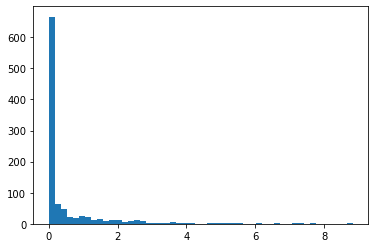

In [36]:
print("t_μ_arr:",t_μ_arr1)
plt.hist(t_μ_arr1,50)

In [22]:
t_μ_arr1

[-0.001070946927939076,
 -6.877783016534522e-05,
 0.00018066704069497064,
 4.835762678267201,
 0.9661743758770172,
 -2.2421518224291503e-06,
 0.4924173438703292,
 0.04998341564350994,
 0.9878725673042936,
 8.080684739674325,
 -0.0001792405528249219,
 -0.0006569940960616805,
 -0.00013542736996896565,
 1.3561274265448446,
 3.6650032372344867,
 -7.545706466771662e-05,
 0.00010169242159463465,
 -0.00011720318434527144,
 -0.002189744933275506,
 0.13423937969491817,
 0.21502252336358652,
 0.21621011867682682,
 2.1965869502164423,
 -0.0002819295841618441,
 0.10137247453531018,
 0.7105198708886746,
 0.03429102037625853,
 0.06735195899091195,
 0.004403008213557769,
 1.1115244890534086,
 0.22885932464851066,
 -4.6527813537977636e-05,
 -0.00013783088070340455,
 8.037035590590676,
 -0.00029868037381675094,
 0.8174414853783674,
 -2.2670436010230333e-05,
 0.15069005467375973,
 0.7206136085442267,
 -3.388889308553189e-05,
 0.038056859077187255,
 -0.00034927645174320787,
 -1.0799492883961648e-05,
 -1.

In [23]:
data = r.RooDataSet("data", "data", r.RooArgSet(x))

# Fill the dataset with values from t_μ_arr1
for value in t_μ_arr1:
    x.setVal(value)
    data.add(r.RooArgSet(x))

In [24]:
#fit_result = chi2_pdf.fitTo(data, r.RooFit.Save())

In [36]:
import ROOT

class MyPdf(ROOT.RooAbsPdf):
    def __init__(self, name, title, x, param1, param2):
        # Call the constructor of the base class
        ROOT.RooAbsPdf.__init__(self, name, title)

        # Define RooRealVar objects for observables and parameters
        self.x = ROOT.RooRealProxy("x", "Observable", x)
        self.param1 = ROOT.RooRealProxy("param1", "Parameter 1", param1)
        self.param2 = ROOT.RooRealProxy("param2", "Parameter 2", param2)

    def evaluate(self):
        # Implement your PDF function here
        # Example: Gaussian PDF
        mean = self.param1
        sigma = self.param2
        x_val = self.x
        arg = (x_val - mean) / sigma
        return ROOT.TMath.exp(-0.5 * arg * arg) / (ROOT.TMath.Sqrt(2 * ROOT.TMath.Pi()) * sigma)

# Create variables and parameters
x = ROOT.RooRealVar("x", "x", -10, 10)
mean = ROOT.RooRealVar("mean", "mean of Gaussian", 0, -10, 10)
sigma = ROOT.RooRealVar("sigma", "width of Gaussian", 1, 0.1, 10)

# Instantiate the custom PDF
my_pdf = MyPdf("my_pdf", "My Gaussian PDF", x, mean, sigma)

# Example usage: evaluate the PDF at a specific point
x.setVal(0)
print("PDF value at x =", x.getVal(), ":", my_pdf.evaluate())

TypeError: none of the 3 overloaded methods succeeded. Full details:
  cannot instantiate abstract class 'RooAbsPdf' (from derived classes, use super() instead)
  cannot instantiate abstract class 'RooAbsPdf' (from derived classes, use super() instead)
  cannot instantiate abstract class 'RooAbsPdf' (from derived classes, use super() instead)

In [37]:
import ROOT

class MyPdf(ROOT.RooAbsPdf):
    def __init__(self, name, title, x, param1, param2):
        # Call the constructor of the base class
        ROOT.RooAbsPdf.__init__(self, name, title)

        # Define RooRealVar objects for observables and parameters
        self.x = ROOT.RooRealProxy("x", "Observable", x)
        self.param1 = ROOT.RooRealProxy("param1", "Parameter 1", param1)
        self.param2 = ROOT.RooRealProxy("param2", "Parameter 2", param2)

    def evaluate(self):
        # Implement your PDF function here
        # Example: Gaussian PDF
        mean = self.param1
        sigma = self.param2
        x_val = self.x
        arg = (x_val - mean) / sigma
        return ROOT.TMath.exp(-0.5 * arg * arg) / (ROOT.TMath.Sqrt(2 * ROOT.TMath.Pi()) * sigma)

# Create variables and parameters
x = ROOT.RooRealVar("x", "x", -10, 10)
mean = ROOT.RooRealVar("mean", "mean of Gaussian", 0, -10, 10)
sigma = ROOT.RooRealVar("sigma", "width of Gaussian", 1, 0.1, 10)

# Instantiate the custom PDF
my_pdf = MyPdf("my_pdf", "My Gaussian PDF", x, mean, sigma)

# Example usage: evaluate the PDF at a specific point
x.setVal(0)
print("PDF value at x =", x.getVal(), ":", my_pdf.evaluate())


TypeError: none of the 3 overloaded methods succeeded. Full details:
  cannot instantiate abstract class 'RooAbsPdf' (from derived classes, use super() instead)
  cannot instantiate abstract class 'RooAbsPdf' (from derived classes, use super() instead)
  cannot instantiate abstract class 'RooAbsPdf' (from derived classes, use super() instead)

In [26]:
k = r.RooRealVar("k", "degrees of freedom", 5, 1, 10)
chi2_pdf = MyFunction(x, k)

xframe = x.frame(r.RooFit.Title("Chi2 fit"))

chi2_pdf.plotOn(xframe)

canvas = r.TCanvas("canvas")
xframe.Draw()
canvas.SaveAs("chi2_fit.png")
fit_result.Print()
k.Print()

TypeError: RooPlot* __cppyy_internal::Dispatcher5::plotOn(RooPlot* arg0, RooAbsReal::PlotOpt arg1) =>
    TypeError: takes at least 2 arguments (1 given)

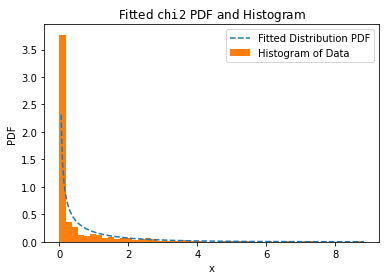

  params: FitParams(df=0.6623133731999326, loc=0.0, scale=1.0)
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.'


In [34]:
from scipy.stats import chi2
import numpy as np 
from scipy import stats
from scipy.special import comb
import matplotlib.pyplot as plt
dist = stats.chi2
bounds = [(0,320)]
res = stats.fit(dist, t_μ_arr1, bounds)
res.plot()
plt.show()
print(res)

likelihood,likelihood_null: 21709.586038727124 21290.65679751175
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (shape,gauss)
Minuit2Minimizer: Minimize with max-calls 2000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 21290.6567975117505
Edm   = 3.15479123868781747e-06
Nfcn  = 382
bkgfrac	  = 0.98688	 +/-  0.0123953	(limited)
l	  = -0.301535	 +/-  0.00475492	(limited)
mu	  = 0.744853	 +/-  0.418114	(limited)
sigma	  = 0.55967	 +/-  0.424146	(limited)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       21568.56859 Edm =       676.3260179 NCalls =     19
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 21568.56859
  Edm           : 676.3260179
  Internal parameters:	[      0.927295218   -0.06003605845    -0.3398369095     -1.166023589]	
  Internal gradient  :	[     -1376.911734      7424.597719      648.9977754     -728.2572351]	
  Internal covariance matrix:
[[  0.00045318899              0              0              0]
 [              0  1.0117882e-06              0              0]
 [              0              0    0.002879314              0]
 [              0              0              0   0.0010890242]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 2000
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       21568.56859 Edm =       676.3260179 NCalls =     19

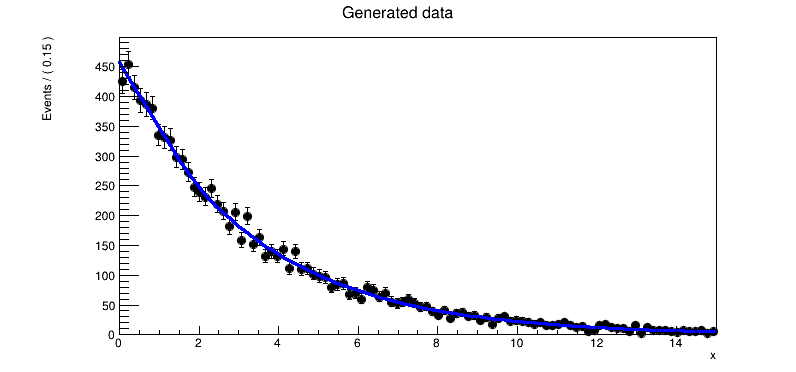

In [6]:
                                    
xframe2 = x.frame(r.RooFit.Title("Generated data"))  
#result = shape.fitTo(data_null,r.RooFit.Save())   
result_null = model.fitTo(data_null,r.RooFit.Save())
#result = model.fitTo(data,r.RooFit.Save())
#data.plotOn(xframe2)
data_null.plotOn(xframe2)
#shape.plotOn(xframe2)
model.plotOn(xframe2)
c2 = r.TCanvas("Exercise02","Exercise02",800,400) 
r.gPad.SetLeftMargin(0.15) ; xframe2.GetYaxis().SetTitleOffset(1.6) ; xframe2.Draw() ;  
c2.Draw()  
likelihood = result.minNll()
likelihood_null = result_null.minNll()
print("likelihood,likelihood_null:",likelihood,likelihood_null)

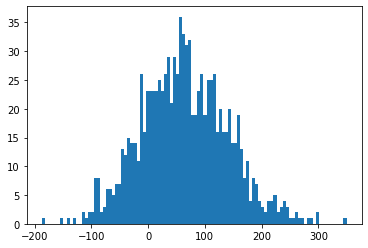

In [ ]:
xframe2 = x1.frame(r.RooFit.Title("Generated data")) 

In [ ]:
print(likelihood)

In [7]:
x = r.RooRealVar("x", "x", -10, 5)
lambd = r.RooRealVar("lambd", "slope", -.3, -5.0, 0.0)                                                        
bkgshape = r.RooExponential("expo", "exponential PDF", x, lambd)
num_events = 10000 # Number of events to generate
Exp_data = bkgshape.generate(r.RooArgSet(x), num_events)
frame = x.frame(r.RooFit.Title("exponential data"))
#Exp_data.plotOn(frame)
c = r.TCanvas("Exercise02","Exercise02",800,400)     
# Fit a Gaussian p.d.f to the data
mean = r.RooRealVar("mean", "mean", -5, -10, 2)
sigma = r.RooRealVar("sigma", "sigma", .5, 0.1, 10)
gauss = r.RooGaussian("gauss", "gauss", x, mean, sigma)
gaussian_data = gauss.generate(r.RooArgSet(x), num_events)
bkgSig = r.RooAddPdf("data","exp+gauss",r.RooArgList(gauss,bkgshape ),r.RooArgList(0,1.)) 
bkgSig_data = bkgSig.generate(r.RooArgSet(x), num_events)
result = model.fitTo(bkgSig_data ,r.RooFit.Save()) 
bkgSig_data.plotOn(frame)
model.plotOn(frame)
#data.plotOn(frame)
likelihood = result.minNll()
print(likelihood)
#gaussian_data.plotOn(frame)
frame.Draw()   
c.Draw()

NameError: name 'model' is not defined

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Exercise02
